In [20]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import time                        # import time
import ipywidgets as widgets       # interactive display
from scipy.stats import pearsonr   # import pearson correlation

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

In [21]:
# Define parameters
gkmax = 0.36
gnamax = 1.2
gl = 0.003

vk = -77
vna = 50
vl = -54.387
cm = 0.010

# Initialize variables
v = -64.9964
m = 0.0530
h = 0.5960
n = 0.3177

I = 0.1
niter = 1000

In [22]:
#a) voltage-time plots
gnahist = np.zeros(niter)
gkhist = np.zeros(niter)
vhist = np.zeros(niter)
mhist = np.zeros(niter)
hhist = np.zeros(niter)
nhist = np.zeros(niter)


dt = 0.1
t = np.arange(niter)*dt


iapp = I*np.ones(niter)
#refract = 2 refractory period in msec


# Simulation loop
for iter in range(niter):

    gna = gnamax*(m**3)*h
    gk = gkmax*(n**4)
    gtot = gna + gk + gl

    vinf = (gna*vna + gk*vk + gl*vl + iapp[iter])/gtot
    tauv = cm/gtot
    v = vinf + (v - vinf)*np.exp(-dt/tauv)

    alpham = 0.1*(v + 40)/(1 - np.exp(-(v + 40)/10))
    betam = 4*np.exp(-0.0556*(v + 65))
    alphan = 0.01*(v + 55)/(1 - np.exp(-(v + 55)/10))
    betan = 0.125*np.exp(-(v + 65)/80)
    alphah = 0.07*np.exp(-0.05*(v + 65))
    betah = 1/(1 + np.exp(-0.1*(v + 35)))
    taum = 1/(alpham + betam)
    tauh = 1/(alphah + betah)
    taun = 1/(alphan + betan)

    minf = alpham*taum
    hinf = alphah*tauh
    ninf = alphan*taun

    m = minf + (m - minf)*np.exp(-dt/taum)
    h = hinf + (h - hinf)*np.exp(-dt/tauh)
    n = ninf + (n - ninf)*np.exp(-dt/taun)

    vhist[iter] = v
    mhist[iter] = m
    hhist[iter] = h
    nhist[iter] = n
    gnahist[iter] = gna
    gkhist[iter] = gk

    hist = [mhist, nhist, hhist]
 


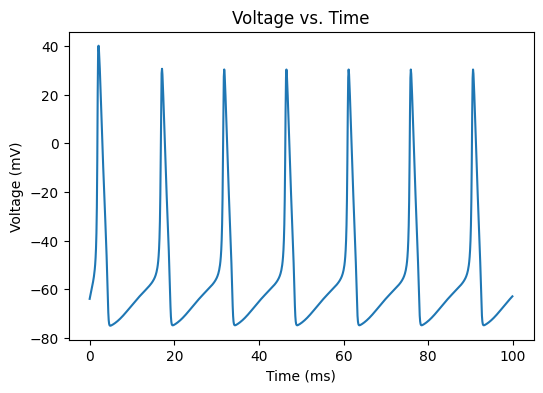

In [23]:
# Plot results
plt.plot(t, vhist)
plt.title('Voltage vs. Time')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
#plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [24]:
#b) Firing Frequency
# Define parameters
gkmax = 0.36
gnamax = 1.2
gl = 0.003

vk = -77
vna = 50
vl = -54.387
cm = 0.010

# Initialize variables
v = -64.9964
m = 0.0530
h = 0.5960
n = 0.3177

I = 0.03
niter = 1000



In [25]:
gnahist = np.zeros(niter)
gkhist = np.zeros(niter)
vhist = np.zeros(niter)
mhist = np.zeros(niter)
hhist = np.zeros(niter)
nhist = np.zeros(niter)


#more parameters
dt = 0.1
t = np.arange(niter)*dt
v_count_spike = -20 #voltage hgh enough to count as a spike mV
spike_counter = 0

iapp = I*np.ones(niter)
#refract = 2 refractory period in msec
spike_time = []

# Simulation loop
for iter in range(niter):
    
    gna = gnamax*(m**3)*h
    gk = gkmax*(n**4)
    gtot = gna + gk + gl

    vinf = (gna*vna + gk*vk + gl*vl + iapp[iter])/gtot
    tauv = cm/gtot
    v = vinf + (v - vinf)*np.exp(-dt/tauv)
    if iter != 0:   
      if vhist[iter-1] < v_count_spike and v > v_count_spike: #prev value is less than vcountspike and current is greater
          spike_counter = spike_counter + 1
          spike_time.append(iter*dt)



    alpham = 0.1*(v + 40)/(1 - np.exp(-(v + 40)/10))
    betam = 4*np.exp(-0.0556*(v + 65))
    alphan = 0.01*(v + 55)/(1 - np.exp(-(v + 55)/10))
    betan = 0.125*np.exp(-(v + 65)/80)
    alphah = 0.07*np.exp(-0.05*(v + 65))
    betah = 1/(1 + np.exp(-0.1*(v + 35)))
    taum = 1/(alpham + betam)
    tauh = 1/(alphah + betah)
    taun = 1/(alphan + betan)

    minf = alpham*taum
    hinf = alphah*tauh
    ninf = alphan*taun

    m = minf + (m - minf)*np.exp(-dt/taum)
    h = hinf + (h - hinf)*np.exp(-dt/tauh)
    n = ninf + (n - ninf)*np.exp(-dt/taun)

    vhist[iter] = v
    mhist[iter] = m
    hhist[iter] = h
    nhist[iter] = n
    gnahist[iter] = gna
    gkhist[iter] = gk

    hist = [mhist, nhist, hhist]

#vhist, iapp, t, hist
 


1
10.0
[4.5]


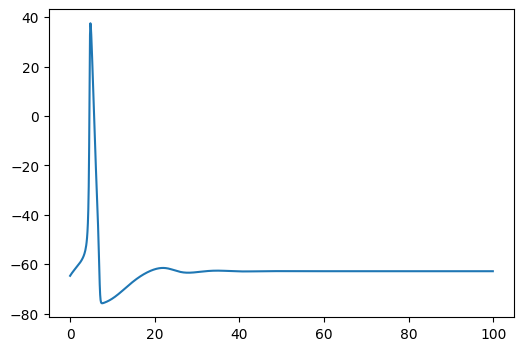

In [26]:
print(spike_counter)
avg_firing_rate = 1000*spike_counter/100 #firing rate in Hz
print(avg_firing_rate)
print(spike_time)


plt.plot(t,vhist)

In [27]:
frequencies =[]
avg_rate = []
spike_time = []
I = np.arange(0, 5, 0.01)
val = []
niter=10000

for current in I: #traverses over all current values
  gnahist = np.zeros(niter)
  gkhist = np.zeros(niter)
  vhist = np.zeros(niter)
  mhist = np.zeros(niter)
  hhist = np.zeros(niter)
  nhist = np.zeros(niter)

  # Initialize variables
  v = -64.9964
  m = 0.0530
  h = 0.5960
  n = 0.3177

  #more parameters
  dt = 0.1
  t = np.arange(niter)*dt
  v_count_spike = -20 #voltage hgh enough to count as a spike mV
  spike_counter = 0

  iapp = current*np.ones(niter) # treat each iteration like an instance of discrete current, start at current = 0, increment etc

  # Simulation loop
  for iter in range(niter):
      
      gna = gnamax*(m**3)*h
      gk = gkmax*(n**4)
      gtot = gna + gk + gl

      vinf = (gna*vna + gk*vk + gl*vl + iapp[iter])/gtot
      tauv = cm/gtot
      v = vinf + (v - vinf)*np.exp(-dt/tauv)
      if iter != 0:   
        if vhist[iter-1] < v_count_spike and v > v_count_spike: #prev value is less than vcountspike and current is greater
            spike_counter = spike_counter + 1
            spike_time.append(iter*dt) 
            


      alpham = 0.1*(v + 40)/(1 - np.exp(-(v + 40)/10))
      betam = 4*np.exp(-0.0556*(v + 65))
      alphan = 0.01*(v + 55)/(1 - np.exp(-(v + 55)/10))
      betan = 0.125*np.exp(-(v + 65)/80)
      alphah = 0.07*np.exp(-0.05*(v + 65))
      betah = 1/(1 + np.exp(-0.1*(v + 35)))
      taum = 1/(alpham + betam)
      tauh = 1/(alphah + betah)
      taun = 1/(alphan + betan)

      minf = alpham*taum
      hinf = alphah*tauh
      ninf = alphan*taun

      m = minf + (m - minf)*np.exp(-dt/taum)
      h = hinf + (h - hinf)*np.exp(-dt/tauh)
      n = ninf + (n - ninf)*np.exp(-dt/taun)

      vhist[iter] = v
      mhist[iter] = m
      hhist[iter] = h
      nhist[iter] = n
      gnahist[iter] = gna
      gkhist[iter] = gk

      hist = [mhist, nhist, hhist]
      

  #vhist, iapp, t, hist
  if spike_counter == 1:
      val.append(current)
  avg_firing_rate = 1000*spike_counter/100 #firing rate in Hz
  frequencies.append(spike_counter) # add the spike counter from each iteration to freq array 
  avg_rate.append(avg_firing_rate) #add individual firing rates to this array
  

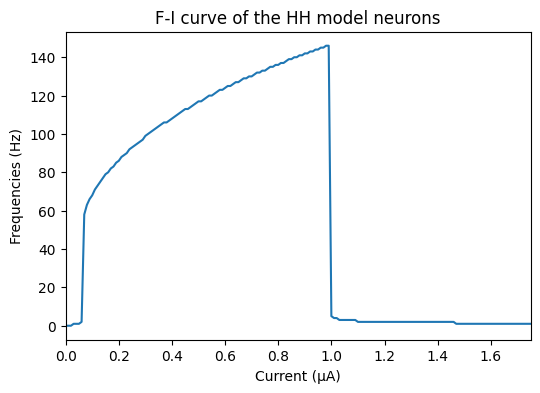

Current for min frequency 0.07
Min frequency 58
Min current,  0.03
Max freq 146
[58, 63, 66, 68, 71, 73, 75, 77, 79, 80, 82, 83, 85, 86, 88, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 106, 107, 108, 109, 110, 111, 112, 113, 113, 114, 115, 116, 117, 117, 118, 119, 120, 120, 121, 122, 123, 123, 124, 125, 125, 126, 127, 127, 128, 129, 129, 130, 130, 131, 132, 132, 133, 133, 134, 135, 135, 136, 136, 137, 137, 138, 139, 139, 140, 140, 141, 141, 142, 142, 143, 143, 144, 144, 145, 145, 146, 146]


In [28]:
newfreqs = [x for x in frequencies if x > 10]


I = np.arange(0, 5, 0.01)

indices = [i for i, v in enumerate(frequencies) if v > 10]
Inew = I[indices]


plt.xlim([0,1.75])
plt.plot(I,frequencies)
plt.title('F-I curve of the HH model neurons')
plt.ylabel('Frequencies (Hz)')
plt.xlabel('Current (μA)')
#plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
plt.show()

print("Current for min frequency", min(Inew))
print("Min frequency", min(newfreqs))
print("Min current, ",min(val))

print("Max freq", max(newfreqs))

print(newfreqs)

In [29]:
#C)
# Define parameters
gkmax = 0.36
gnamax = 1.2
gl = 0.003

vk = -77
vna = 50
vl = -54.387
cm = 0.010

# Initialize variables
v = -64.9964
m = 0.0530
h = 0.5960
n = 0.3177

#I = 0.1
niter = 1000

In [30]:
gnahist = np.zeros(niter)
gkhist = np.zeros(niter)
vhist = np.zeros(niter)
mhist = np.zeros(niter)
hhist = np.zeros(niter)
nhist = np.zeros(niter)


dt = 0.1
t = np.arange(niter)*dt


iapp = [0]*494 + [-0.15]*13 + [0]*493
#refract = 2 refractory period in msec


# Simulation loop
for iter in range(niter):

    gna = gnamax*(m**3)*h
    gk = gkmax*(n**4)
    gtot = gna + gk + gl

    vinf = (gna*vna + gk*vk + gl*vl + iapp[iter])/gtot
    tauv = cm/gtot
    v = vinf + (v - vinf)*np.exp(-dt/tauv)

    alpham = 0.1*(v + 40)/(1 - np.exp(-(v + 40)/10))
    betam = 4*np.exp(-0.0556*(v + 65))
    alphan = 0.01*(v + 55)/(1 - np.exp(-(v + 55)/10))
    betan = 0.125*np.exp(-(v + 65)/80)
    alphah = 0.07*np.exp(-0.05*(v + 65))
    betah = 1/(1 + np.exp(-0.1*(v + 35)))
    taum = 1/(alpham + betam)
    tauh = 1/(alphah + betah)
    taun = 1/(alphan + betan)

    minf = alpham*taum
    hinf = alphah*tauh
    ninf = alphan*taun

    m = minf + (m - minf)*np.exp(-dt/taum)
    h = hinf + (h - hinf)*np.exp(-dt/tauh)
    n = ninf + (n - ninf)*np.exp(-dt/taun)

    vhist[iter] = v
    mhist[iter] = m
    hhist[iter] = h
    nhist[iter] = n
    gnahist[iter] = gna
    gkhist[iter] = gk

    hist = [mhist, nhist, hhist]


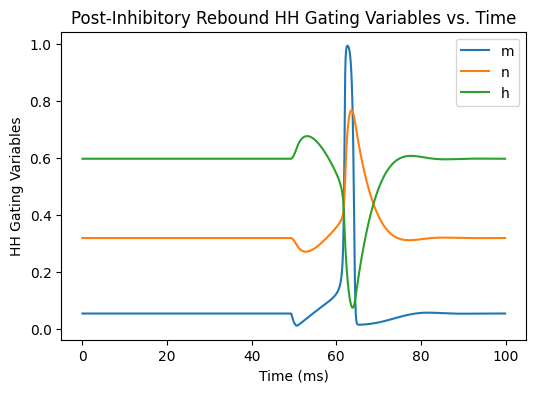

In [31]:
# Plot results
#plt.plot(t, vhist)
plt.title('Post-Inhibitory Rebound HH Gating Variables vs. Time')
plt.xlabel('Time (ms)')
plt.ylabel('HH Gating Variables')
plt.plot(t, mhist, label = "m")
plt.plot(t, nhist, label = "n")
plt.plot(t, hhist, label = "h")
plt.legend()
plt.show()

In [32]:
def my_GWN(sig):
    
    # Retrieve simulation parameters
    Lt = niter
        
    #generate GWN
    I =  sig * np.random.randn(Lt)
    
    return I

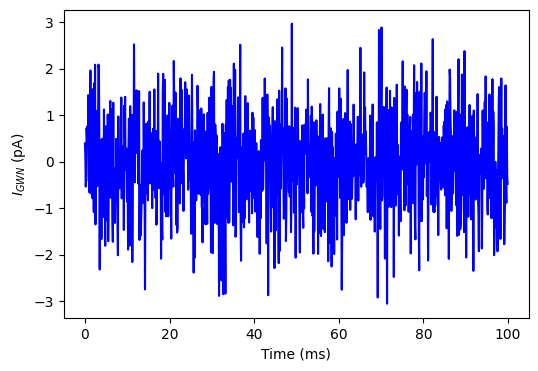

In [33]:
niter = 1000
sig_ou = 1
I_GWN = my_GWN(sig=sig_ou) #this fn introduces noise
plt.plot(t, I_GWN, 'b')
#plt.xlim(0,50) #limit to plt till 50
plt.xlabel('Time (ms)')
plt.ylabel(r'$I_{GWN}$ (pA)');

In [34]:
# Define parameters
gkmax = 0.36
gnamax = 1.2
gl = 0.003

vk = -77
vna = 50
vl = -54.387
cm = 0.010

# Initialize variables
v = -64.9964
m = 0.0530
h = 0.5960
n = 0.3177

I = 0.1
niter = 1000

In [35]:
gnahist = np.zeros(niter)
gkhist = np.zeros(niter)
vhist = np.zeros(niter)
mhist = np.zeros(niter)
hhist = np.zeros(niter)
nhist = np.zeros(niter)
spike_counter = 0

dt = 0.1
t = np.arange(niter)*dt
iapp = I*np.ones(niter) + I_GWN
#refract = 2 refractory period in msec


# Simulation loop
for iter in range(niter):

    gna = gnamax*(m**3)*h
    gk = gkmax*(n**4)
    gtot = gna + gk + gl

    vinf = (gna*vna + gk*vk + gl*vl + iapp[iter])/gtot
    tauv = cm/gtot
    v = vinf + (v - vinf)*np.exp(-dt/tauv)

    if iter != 0:   
      if vhist[iter-1] < v_count_spike and v > v_count_spike: #prev value is less than vcountspike and current is greater
        spike_counter = spike_counter + 1

    alpham = 0.1*(v + 40)/(1 - np.exp(-(v + 40)/10))
    betam = 4*np.exp(-0.0556*(v + 65))
    alphan = 0.01*(v + 55)/(1 - np.exp(-(v + 55)/10))
    betan = 0.125*np.exp(-(v + 65)/80)
    alphah = 0.07*np.exp(-0.05*(v + 65))
    betah = 1/(1 + np.exp(-0.1*(v + 35)))
    taum = 1/(alpham + betam)
    tauh = 1/(alphah + betah)
    taun = 1/(alphan + betan)

    minf = alpham*taum
    hinf = alphah*tauh
    ninf = alphan*taun

    m = minf + (m - minf)*np.exp(-dt/taum)
    h = hinf + (h - hinf)*np.exp(-dt/tauh)
    n = ninf + (n - ninf)*np.exp(-dt/taun)

    vhist[iter] = v
    mhist[iter] = m
    hhist[iter] = h
    nhist[iter] = n
    gnahist[iter] = gna
    gkhist[iter] = gk

    hist = [mhist, nhist, hhist]
 


10


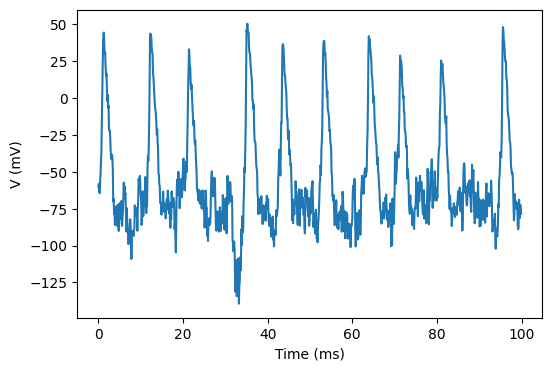

In [36]:
plt.plot(t,vhist)
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)');
print(spike_counter)

4


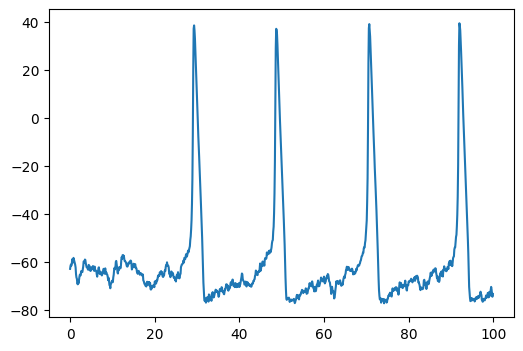

In [37]:

frequencies =[]
avg_rate = []
spike_time = []
val = []
niter = 1000

#___________________________________

I_mean = np.arange(0.,5.,0.01)
I_std = np.arange(0.,0.5,0.1)
spk_count = np.zeros((len(I_mean),len(I_std)))
cv_isi = np.empty((len(I_mean),len(I_std)))
cv_isi[:] = np.NaN

#______________
for ii in range(len(I_mean)):
  frequencies =[]
  avg_rate = []
  val = []

  for jj in range(len(I_std)):
    spike_time = []
    spike_counter = 0
    gnahist = np.zeros(niter)
    gkhist = np.zeros(niter)
    vhist = np.zeros(niter)
    mhist = np.zeros(niter)
    hhist = np.zeros(niter)
    nhist = np.zeros(niter)

    # Initialize variables
    v = -64.9964
    m = 0.0530
    h = 0.5960
    n = 0.3177

    #more parameters
    dt = 0.1
    t = np.arange(niter)*dt
    v_count_spike = -20 #voltage hgh enough to count as a spike mV
    spike_counter = 0

    I_GWN = my_GWN(sig=I_std[jj])
    iapp = I_mean[ii]*np.ones(niter) + I_GWN # treat each iteration like an instance of current with noise, start at current , increment etc

    # Simulation loop
    for iter in range(niter):
        
        gna = gnamax*(m**3)*h
        gk = gkmax*(n**4)
        gtot = gna + gk + gl

        vinf = (gna*vna + gk*vk + gl*vl + iapp[iter])/gtot
        tauv = cm/gtot
        v = vinf + (v - vinf)*np.exp(-dt/tauv)
        if iter != 0:   
          if vhist[iter-1] < v_count_spike and v > v_count_spike: #prev value is less than vcountspike and current is greater
              spike_counter = spike_counter + 1
              spike_time.append(iter*dt) 
        alpham = 0.1*(v + 40)/(1 - np.exp(-(v + 40)/10))
        betam = 4*np.exp(-0.0556*(v + 65))
        alphan = 0.01*(v + 55)/(1 - np.exp(-(v + 55)/10))
        betan = 0.125*np.exp(-(v + 65)/80)
        alphah = 0.07*np.exp(-0.05*(v + 65))
        betah = 1/(1 + np.exp(-0.1*(v + 35)))
        taum = 1/(alpham + betam)
        tauh = 1/(alphah + betah)
        taun = 1/(alphan + betan)

        minf = alpham*taum
        hinf = alphah*tauh
        ninf = alphan*taun

        m = minf + (m - minf)*np.exp(-dt/taum)
        h = hinf + (h - hinf)*np.exp(-dt/tauh)
        n = ninf + (n - ninf)*np.exp(-dt/taun)

        vhist[iter] = v
        mhist[iter] = m
        hhist[iter] = h
        nhist[iter] = n
        gnahist[iter] = gna
        gkhist[iter] = gk

        hist = [mhist, nhist, hhist]
      
        if spike_counter == 1:
          val.append(current)
    
    if jj == 1 and ii == 1:  
        plt.plot(t,vhist)
        print(spike_counter)
    avg_firing_rate = 1000*spike_counter/100 #firing rate in Hz
    frequencies.append(spike_counter)
    spk_count[ii,jj] = spike_counter
    if len(spike_time)>3:
      isi = np.diff(spike_time)
      cv_isi[ii,jj] = np.std(isi)/np.mean(isi)

<Figure size 600x400 with 0 Axes>

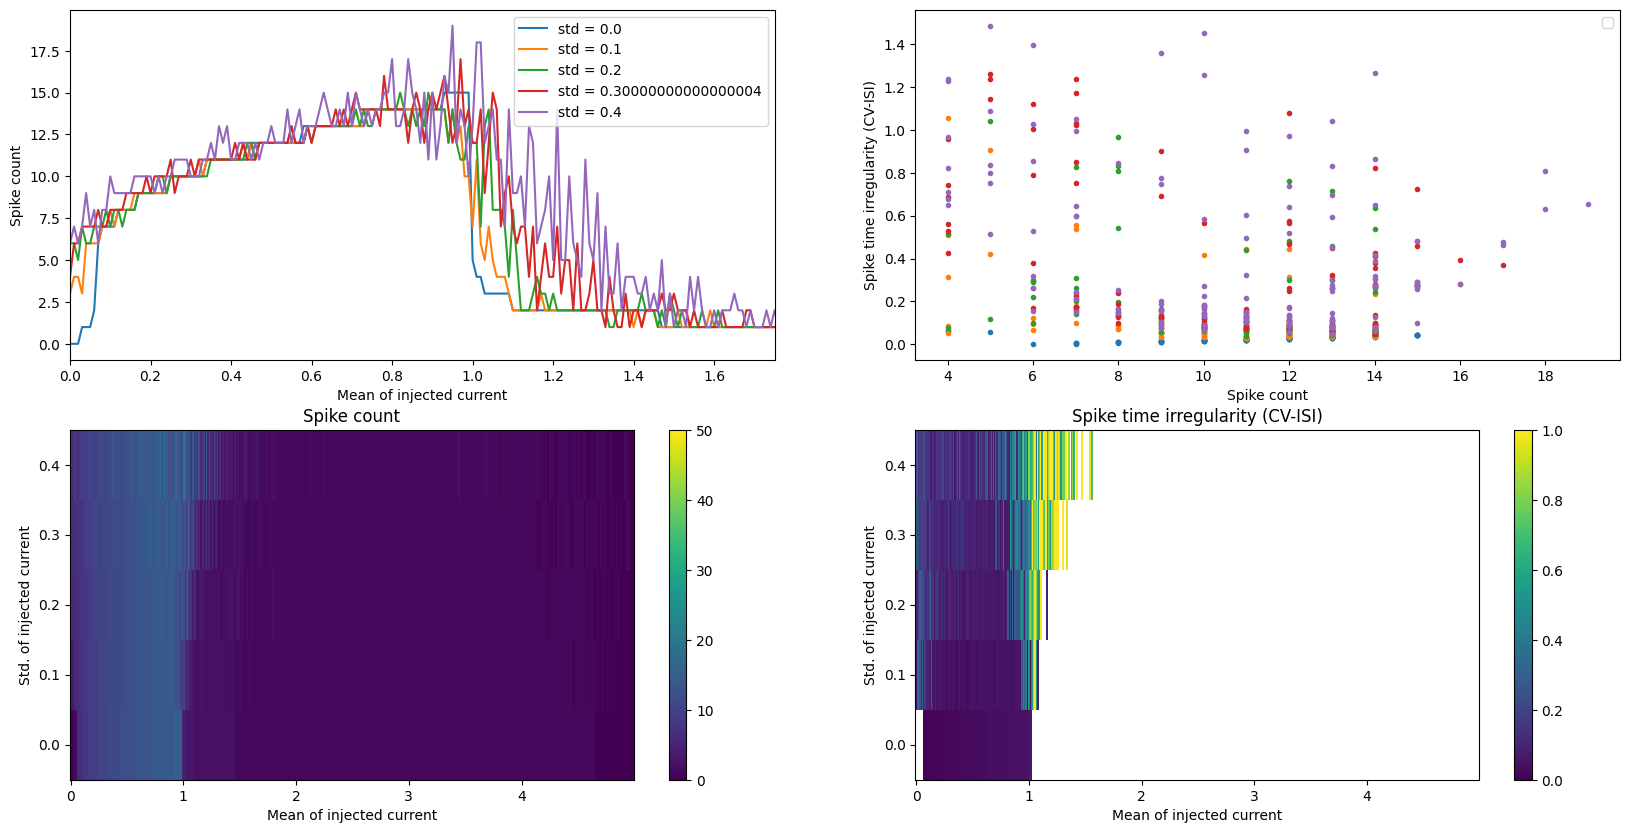

In [38]:
plt.figure()
plt.figure(figsize=(20, 10))

# Plot the F-I curve i.e. Output firing rate as a function of input mean. Different lines correspond to different std. 
# Note how std changes the F-I curve
plt.subplot(2,2,1)
for ii in range(5):
  plt.plot(I_mean,spk_count[:,ii],label='std = '+str(I_std[ii]))
plt.ylabel('Spike count')
plt.xlabel('Mean of injected current');
plt.legend()
plt.xlim([0,1.75])


# Plot firing rate vs coeffcient of variance of inter-spike interval
# Do you see any pattern here? 
plt.subplot(2,2,2)
plt.plot(spk_count,cv_isi,'.')
plt.xlabel('Spike count')
plt.ylabel('Spike time irregularity (CV-ISI)');
plt.legend()

# Plot Firing rate as a function of both mean and std. Firing rate is rendered as color
plt.subplot(2,2,3)
plt.pcolor(I_mean,I_std,spk_count.T)
plt.ylabel('Std. of injected current')
plt.xlabel('Mean of injected current');
plt.colorbar()
plt.clim(0,50)
plt.title('Spike count');

# Plot Spike time irregularity (CV_ISI) as a function of both mean and std. CV_isi is rendered as color
plt.subplot(2,2,4)
plt.pcolor(I_mean,I_std,cv_isi.T)
plt.ylabel('Std. of injected current')
plt.xlabel('Mean of injected current');
plt.colorbar()
plt.clim(0,1)
plt.title('Spike time irregularity (CV-ISI)');